# Stacked Model Visualization

In [1]:
cd /project/bioinformatics/DLLab/Cooper/Code/AutismProject/Parallelization

/project/bioinformatics/DLLab/s169682/Code/AutismProject/Parallelization


In [2]:
import keras

Using TensorFlow backend.


In [3]:
lsModels=[]
for i in range(50):
    if i<10:
        sModelNum='0'+ str(i)
    else:
        sModelNum=str(i)
    lsModels.append('Stack_'+sModelNum)


In [4]:
# %load IMPAC_FetchDLValidation.py
import os
import pandas as pd
import numpy as np
import pickle as pkl

# Initialize the path to the data and the indices to loop over
sDataPath = '/project/bioinformatics/DLLab/Cooper/Code/AutismProject/Parallelization/TrainedModels/Stacked/'

lsModels=[]
for i in range(50):
    if i<10:
        sModelNum='0'+ str(i)
    else:
        sModelNum=str(i)
    lsModels.append('Stack_'+sModelNum)

pdSummaryData=pd.DataFrame(index=lsModels, columns=['Mean CV ROC', 'CV0 ROC', 'CV1 ROC', 'CV2 ROC'])

# Loop through all Cross Validation Results and re-save the mean ROC AUC
for i in range(50):

    # Get model number tag
    if i<10:
        sModelNum='0'+ str(i)
    else:
        sModelNum=str(i)

    if os.path.isfile(sDataPath + 'Stack_' + sModelNum + 'CrossVal0ModelROCScore.p')\
            and os.path.isfile(sDataPath + 'Stack_' + sModelNum + 'CrossVal1ModelROCScore.p')\
            and os.path.isfile(sDataPath + 'Stack_' + sModelNum + 'CrossVal2ModelROCScore.p'):
        CV0=pkl.load(open((sDataPath + 'Stack_' + sModelNum + 'CrossVal0ModelROCScore.p'), 'rb'))
        CV1=pkl.load(open((sDataPath + 'Stack_' + sModelNum + 'CrossVal1ModelROCScore.p'), 'rb'))
        CV2=pkl.load(open((sDataPath + 'Stack_' + sModelNum + 'CrossVal2ModelROCScore.p'), 'rb'))

        CVMean=(CV0+CV1+CV2)/3.0
        
        pdSummaryData.loc['Stack_'+sModelNum, 'Mean CV ROC']=CVMean
        pdSummaryData.loc['Stack_'+sModelNum, 'CV0 ROC']=CV0
        pdSummaryData.loc['Stack_'+sModelNum, 'CV1 ROC']=CV1
        pdSummaryData.loc['Stack_'+sModelNum, 'CV2 ROC']=CV2
        
        pkl.dump(CVMean, open((sDataPath + 'Stack_' + sModelNum + 'MeanCVROCScore.p'), 'wb'))

# Walk through the directory and find the model with the highest ROC score
flMax = 0
sBest = 'run failed'

for root, dirs, files in os.walk(sDataPath):
    files.sort()

    for file in files:
        if file.endswith('MeanCVROCScore.p'):
            flMeanVal=pkl.load(open(os.path.join(sDataPath, file), 'rb'))
            if flMeanVal>flMax:
                flMax=flMeanVal
                sBest=file

print('  ',sBest, flMax)


   Stack_18MeanCVROCScore.p 0.9115868161739722


In [5]:
pdSummaryData

,Mean CV ROC,CV0 ROC,CV1 ROC,CV2 ROC
Stack_00,0.903706,0.723411,0.988379,0.999327
Stack_01,NaN,NaN,NaN,NaN
Stack_02,0.902322,0.70717,0.999796,1
Stack_03,NaN,NaN,NaN,NaN
Stack_04,0.896705,0.716548,0.98138,0.992188
Stack_05,0.885604,0.677472,0.979341,1
Stack_06,0.902231,0.711179,0.995515,1
Stack_07,0.89197,0.675977,0.999932,1
Stack_08,0.903591,0.711043,0.999796,0.999933
Stack_09,NaN,NaN,NaN,NaN


In [6]:
for sCol in pdSummaryData.columns:
    pdSummaryData[sCol] = pd.to_numeric(pdSummaryData[sCol]).fillna(0)

In [7]:
pdSummaryData.nlargest(5, 'Mean CV ROC')

,Mean CV ROC,CV0 ROC,CV1 ROC,CV2 ROC
Stack_18,0.911587,0.734760,1.000000,1.000000
Stack_41,0.908655,0.729901,0.996602,0.999461
Stack_20,0.907985,0.725858,0.998097,1.000000
Stack_16,0.906593,0.724125,0.995923,0.999731
Stack_36,0.905788,0.718586,0.998777,1.000000


In [13]:
import gc

In [14]:
dModelHistories={}
def fFetchModelHist(iModel):
    if iModel<10:
        sModel='Stack_0'+str(iModel)
    else:
        sModel='Stack_'+str(iModel)
    print(sModel)
    dCVHist={}
    for iCV in range(3):
        if os.path.isfile(os.path.join(sDataPath, (sModel+'CrossVal'+str(iCV)+'ModelHistory.p'))):
            ModelHist=pkl.load(open(os.path.join(sDataPath, (sModel+'CrossVal'+str(iCV)+'ModelHistory.p')), 'rb'))
            dCVHist[('CV'+str(iCV))]=ModelHist.history
            del(ModelHist)
        else:
            dCVHist[('CV'+str(iCV))]=0
    dModelHistories[sModel]=dCVHist
    del(dCVHist)
    gc.collect()
    return dModelHistories[sModel]

In [15]:
import matplotlib.pyplot as plt
def fPlot(iModel, sType):
    
    dCVHist=fFetchModelHist(iModel)
    
    if iModel<10:
        sModel='Stack_0'+str(iModel)
    else:
        sModel='Stack_'+str(iModel)
    
    plt.style.use('seaborn-white')
    
    plt.figure(1)
    plt.plot(range(len(dCVHist['CV0'][sType])), dCVHist['CV0'][sType],
             range(len(dCVHist['CV1'][sType])), dCVHist['CV1'][sType],
             range(len(dCVHist['CV2'][sType])), dCVHist['CV2'][sType]
            )
    plt.gca().set_prop_cycle(None)
    plt.plot(range(len(dCVHist['CV0']['val_'+sType])), dCVHist['CV0']['val_'+sType], '--', 
             range(len(dCVHist['CV1']['val_'+sType])), dCVHist['CV1']['val_'+sType], '--',
             range(len(dCVHist['CV2']['val_'+sType])), dCVHist['CV2']['val_'+sType], '--',
             solid_capstyle='round'
            )


    plt.legend(('Training Fold 1', 'Training Fold 2', 'Training Fold 3',
               'Validation Fold 1', 'Validation Fold 3', 'Validation Fold 3'),
               loc='center left', bbox_to_anchor=(1,0.5)
              )
    
    flTestPerformance = pkl.load(open('/project/bioinformatics/DLLab/Cooper/Code/AutismProject/Parallelization/TrainedModels/Stacked/'+sModel+'FullModelROCScore.p', 'rb'))
        
    plt.title('Training ' + sType + ' for Architecture Number ' + sModel
              +'\n Test Performance: ' + str(flTestPerformance))
    plt.xlabel('Epoch')
    plt.grid(False)
    plt.ylabel(sType)

plt.show()

In [16]:
flTestPerformance = pkl.load(open('/project/bioinformatics/DLLab/Cooper/Code/AutismProject/Parallelization/TrainedModels/Stacked/Stack_18FullModelROCScore.p', 'rb'))
flTestPerformance

0.7562530062530062

Stack_18


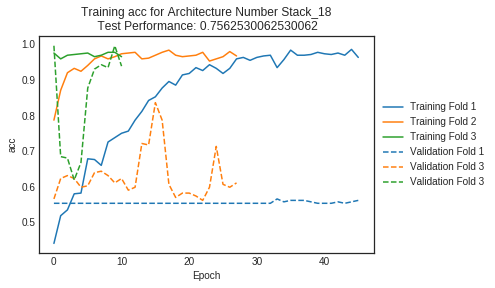

In [17]:
iModel=18
sType='acc'
fPlot(iModel, sType)

In [ ]:
iModel=41
fPlot(iModel, sType)

In [ ]:
iModel=20
fPlot(iModel, sType)

In [ ]:
iModel=16
fPlot(iModel, sType)

In [ ]:
iModel=36
fPlot(iModel, sType)